# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [75]:
# Import relevant libraries
from bs4 import BeautifulSoup
from splinter import Browser
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import driver manager
from webdriver_manager.chrome import ChromeDriverManager

driver_path=ChromeDriverManager().install()
print(f'driver_path is {type(driver_path)} with value of :{driver_path}')

[WDM] - Downloading: 100%|████████████████| 6.78M/6.78M [00:01<00:00, 4.64MB/s]


driver_path is <class 'str'> with value of :C:\Users\src54\.wdm\drivers\chromedriver\win32\110.0.5481\chromedriver.exe


In [76]:
browser = Browser('chrome', executable_path=driver_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [77]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
BASE_URL = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(BASE_URL)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [78]:
# Create a Beautiful Soup Object
html = browser.html
soup =BeautifulSoup(html,'html.parser')

In [79]:
# Extract all rows of data
rows=soup.find_all('tr', class_='data-row')

# Store the table

# Loop through the rows


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [80]:
# Create an empty list
#datalist=[]
idlist=[]
tdlist=[]
solist=[]
lslist=[]
monthlist=[]
mtlist=[]
prlist=[]
# Loop through the scraped data to create a list of rows
for elements in rows:
    id_ = elements.find_all('td')[0]
    idlist.append(id_.text)
    td = elements.find_all('td')[1]
    tdlist.append(td.text)
    so = elements.find_all('td')[2]
    solist.append(so.text)
    ls = elements.find_all('td')[3]
    lslist.append(ls.text)
    month = elements.find_all('td')[4]
    monthlist.append(month.text)
    mt = elements.find_all('td')[5]
    mtlist.append(mt.text)
    pr = elements.find_all('td')[6]
    prlist.append(pr.text)
#datalist = [idlist,tdlist,solist,lslist,monthlist,mtlist,prlist]

In [81]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

#Wanted to go the Dictionary route, so I opted to call the elements directly instead of calling the same lists over and over.
#Format would have been columnlist[index]:datalist[index] if I went the other direction.

#columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
dictionary = {'id':idlist,'terrestrial_date':tdlist,'sol':solist,'ls':lslist,'month':monthlist,
              'min_temp':mtlist,'pressure':prlist}
df=pd.DataFrame(dictionary)

In [82]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [83]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [84]:
# Change data types for data analysis
df=df.astype({'id': 'int64','terrestrial_date':'datetime64','sol':'int64','ls':'int64','month':'int64','min_temp':'float64',
          'pressure':'float64'})

In [85]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [86]:
# 1. How many months are there on Mars?
months = df['month'].value_counts()
len(months)

12

In [87]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].value_counts()
len(days)

1867

In [88]:
# 3. What is the average low temperature by month?
m1 = df.loc[df['month'] == 1]['min_temp'].mean()
m2 = df.loc[df['month'] == 2]['min_temp'].mean()
m3 = df.loc[df['month'] == 3]['min_temp'].mean()
m4 = df.loc[df['month'] == 4]['min_temp'].mean()
m5 = df.loc[df['month'] == 5]['min_temp'].mean()
m6 = df.loc[df['month'] == 6]['min_temp'].mean()
m7 = df.loc[df['month'] == 7]['min_temp'].mean()
m8 = df.loc[df['month'] == 8]['min_temp'].mean()
m9 = df.loc[df['month'] == 9]['min_temp'].mean()
m10 = df.loc[df['month'] == 10]['min_temp'].mean()
m11 = df.loc[df['month'] == 11]['min_temp'].mean()
m12 = df.loc[df['month'] == 12]['min_temp'].mean()
monthaverages = (m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
monthaverages

(-77.16091954022988,
 -79.93258426966293,
 -83.30729166666667,
 -82.74742268041237,
 -79.30872483221476,
 -75.29931972789116,
 -72.28169014084507,
 -68.38297872340425,
 -69.17164179104478,
 -71.98214285714286,
 -71.98550724637681,
 -74.45180722891567)

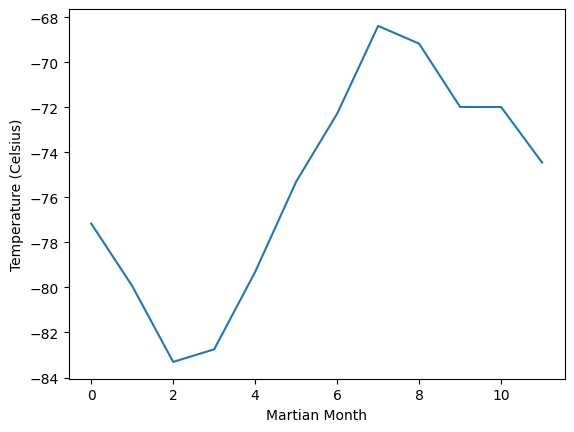

In [89]:
# Plot the average temperature by month
plt.plot([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12])
plt.xlabel('Martian Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [90]:
# Identify the coldest and hottest months in Curiosity's location
import numpy as np
hottest = np.max(monthaverages)
hotmonth = monthaverages.index(hottest)
coldest = np.min(monthaverages)
coldmonth = monthaverages.index(coldest)
print(coldmonth, hotmonth)

2 7


In [91]:
# 4. Average pressure by Martian month
p1 = df.loc[df['month'] == 1]['pressure'].mean()
p2 = df.loc[df['month'] == 2]['pressure'].mean()
p3 = df.loc[df['month'] == 3]['pressure'].mean()
p4 = df.loc[df['month'] == 4]['pressure'].mean()
p5 = df.loc[df['month'] == 5]['pressure'].mean()
p6 = df.loc[df['month'] == 6]['pressure'].mean()
p7 = df.loc[df['month'] == 7]['pressure'].mean()
p8 = df.loc[df['month'] == 8]['pressure'].mean()
p9 = df.loc[df['month'] == 9]['pressure'].mean()
p10 = df.loc[df['month'] == 10]['pressure'].mean()
p11 = df.loc[df['month'] == 11]['pressure'].mean()
p12 = df.loc[df['month'] == 12]['pressure'].mean()
monthaveragesp = (p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12)
monthaveragesp

(862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024)

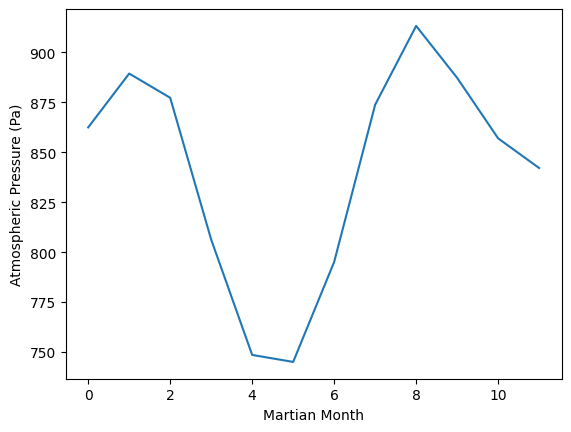

In [99]:
# Plot the average pressure by month
plt.plot([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12])
plt.xlabel('Martian Month')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.show()

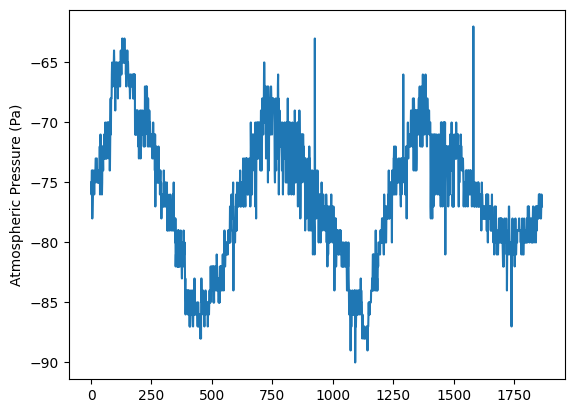

In [98]:
# 5. How many terrestrial (earth) days are there in a Martian year?

print ('By observing temperature peaks, we can observe a martian year is approximately 1400-750, or 650 Earth days.')
plt.plot(df['min_temp'])
plt.xlabel('Earth Days')
plt.ylabel('Temperature (Celsius)')
plt.show()
m1 = df.loc[df['month'] == 1]['min_temp'].mean()




In our data, we have observed that the coldest month on Mars is the second month, while the hottest month is the seventh. Since they are far below 0 degrees celsius, they are both extremely cold relative to Earth temperatures.



Atmospheric pressure appears to hit its low on average during Mars' 5th month, while it peaks during its 8th month. 

Via our temperature graphs, we observe peaks around days 1400 and day 750, which makes our estimated length of a Martian year about 650 days. This is close to but falls a little short of the actual length of a Martian year at 687 days. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [100]:
# Write the data to a CSV
df.to_csv('output.csv')

In [101]:
browser.quit()